# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [51]:
import numpy as np #combien de coups necessaires pour bien arriver

In [52]:
### Simulation du lancé de dé

In [53]:
def Roll():
    return int(np.random.choice (range(1,7),1))

In [54]:
Roll()

4

### Compléter le code et commenter

In [55]:
NA,A,S=0,0,10
temp=Roll()
NA+=1
print(NA,temp,A) 
while temp!=6: 
    NA=NA+1
    temp=Roll()
    print("temp=",temp,"|NA=",NA)
A=1
while A<S:
    temp=Roll()
    NA=NA+1
    print("temp=",temp,"|NA=",NA,"A=",A)
    if A+temp<S:
        A=A+temp
        print("temp=",temp,"|NA=",NA,"A=",A)
    elif A+temp==S:
        A=S
    else:
        print("temp=",temp,"|NA=",NA,"A=",A)
        continue

1 1 0
temp= 1 |NA= 2
temp= 5 |NA= 3
temp= 1 |NA= 4
temp= 2 |NA= 5
temp= 5 |NA= 6
temp= 3 |NA= 7
temp= 2 |NA= 8
temp= 5 |NA= 9
temp= 5 |NA= 10
temp= 2 |NA= 11
temp= 5 |NA= 12
temp= 2 |NA= 13
temp= 6 |NA= 14
temp= 5 |NA= 15 A= 1
temp= 5 |NA= 15 A= 6
temp= 1 |NA= 16 A= 6
temp= 1 |NA= 16 A= 7
temp= 2 |NA= 17 A= 7
temp= 2 |NA= 17 A= 9
temp= 4 |NA= 18 A= 9
temp= 4 |NA= 18 A= 9
temp= 3 |NA= 19 A= 9
temp= 3 |NA= 19 A= 9
temp= 6 |NA= 20 A= 9
temp= 6 |NA= 20 A= 9
temp= 1 |NA= 21 A= 9


# <font color='red'>Comments</font> :
<ul>
<li>At first we have moved the dice from its initial position to reach the destination </li>
<li>We get out of the while loop when we get the value 6 of the dice</li>
</ul>

### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [61]:
def sim(S):
    A=0
    NA=0
    temp=Roll()
    NA=NA+1
    while (temp !=6) :
        temp=Roll()
        NA+=1
    A=1
    while (A<S) :
        temp=Roll()
        if((temp+A<S)):
            NA+=1
            A+=temp
        elif temp+A>S :
            NA+=1
        else:
            A=S
            NA+=1
    return NA

# Comments : 
<ul>
<li>The function sim() helped us to determine the number of tries needed to move out of the prison and reach the distination with a certain number of steps S </li>
</ul>

In [33]:
sim(20)

23

In [72]:
L=[sim(30) for i in range (10000)]
Moy=sum(L)/10000
print('estimation de la moyenne de X_30={}'.format(Moy))

estimation de la moyenne de X_30=19.0388


# <font color='blue'>Comments</font> :
<ul>
    <li> we have repeated this function 10000 times , with S=30 this time . </li>

### Simulation de $10^5$  scénario 

In [64]:
X=list(range(10,20))
Y=[sum([sim(u) for i in range (10000)])/10000 for u in X] 

# <font color='purple'>Comments</font> :
<ul> X  is an array that includes the number of steps with a dimension equals 10 </ul>
<ul> Y  is an array with a dimension equals 10 too it depends of X </ul>

In [65]:
import matplotlib.pyplot as plt 

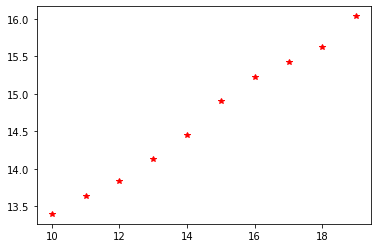

In [66]:
plt.plot(X,Y,'*r')
plt.show()

In [67]:
from scipy import stats
import numpy as np
slope,intercept,r_value,p_value,std_err = stats.linregress(X,Y)

# <font color='red'>Comments</font> :
<ul>
    <li> Ici  on a Calculé une régression linéaire des moindres carrés pour deux mesures </li>
    </ul>

In [73]:
slope

0.29886181818181823

In [69]:
intercept

10.333263636363636

In [70]:
yy=[slope*u+intercept for u in X]

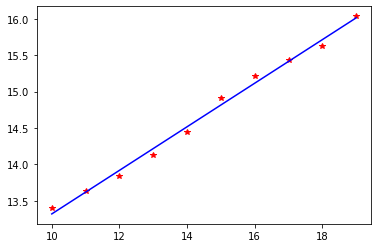

In [71]:
plt.plot(X,Y,'*r',X,yy,'-b')

# <font color='red'>Comments</font> :
1. Il s'agit d'une droite de la forme y=ax+b
2. on a fait une stimulation pour avoir l'estimation de la moyenne et dégager une formule mathématique
3. on a remarqué une relation entre n,slope et intercept
4. on a remarqué que pour n'importe quelle valeur de S on peut savoir le nombre moyen des coups 